# fold 분포 확인

In [20]:
import matplotlib.pyplot as plt
from pycocotools.coco import COCO

loading annotations into memory...
Done (t=0.14s)
creating index...
index created!
loading annotations into memory...
Done (t=0.32s)
creating index...
index created!
loading annotations into memory...
Done (t=0.14s)
creating index...
index created!
loading annotations into memory...
Done (t=0.19s)
creating index...
index created!
loading annotations into memory...
Done (t=0.11s)
creating index...
index created!
[247, 248, 254, 227, 228]
[4028, 4068, 4046, 4012, 4066]
[14120, 14078, 14094, 14155, 14101]


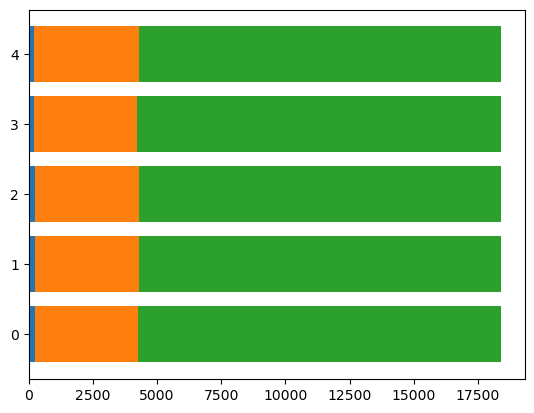

In [21]:
train = []
train.append(COCO("./train0.json"))
train.append(COCO("./train1.json"))
train.append(COCO("./train2.json"))
train.append(COCO("./train3.json"))
train.append(COCO("./train4.json"))

small = [0] * 5
medium = [0] * 5
large = [0] * 5

for idx, t in enumerate(train):
    anns = t.loadAnns(t.getAnnIds())
    for ann in anns:
        if ann['area'] < 1024:
            small[idx] += 1
        elif ann['area'] < 9216:
            medium[idx] += 1
        else:
            large[idx] +=1

print(small)
print(medium)
print(large)

plt.barh(range(5), small)
plt.barh(range(5), medium, left=small)
plt.barh(range(5), large, left=[small[i] + medium[i] for i in range(5)])
plt.show()



loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
loading annotations into memory...
Done (t=0.14s)
creating index...
index created!
loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
loading annotations into memory...
Done (t=0.17s)
creating index...
index created!


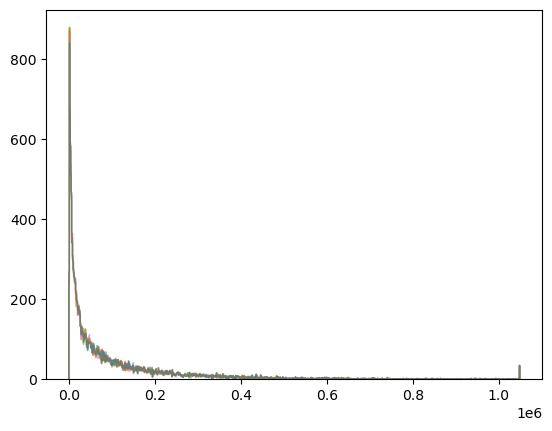

In [22]:
train = []
train.append(COCO("./train0.json"))
train.append(COCO("./train1.json"))
train.append(COCO("./train2.json"))
train.append(COCO("./train3.json"))
train.append(COCO("./train4.json"))

hists = []

for idx, t in enumerate(train):
    anns = t.loadAnns(t.getAnnIds())
    areas = []
    for ann in anns:
        areas.append(ann['area'])
    hists.append(areas)

plt.hist((hists[0], hists[1], hists[2], hists[3], hists[4]),histtype='step', bins=1000, alpha = 0.5)
plt.savefig("./figure.png")
plt.show()


# submission 확인

In [31]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw, ImageColor
import random

In [36]:
data = pd.read_csv("./output.csv")
img_path = "./dataset/"

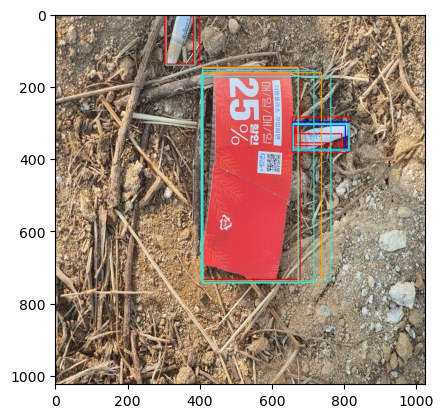

In [43]:
idx = 50

colors = ["Red", "Orange", "Green", "Yellow", "Brown", "Blue", "Pink", "Turquoise", "Violet", "White"] 
low = data.loc[idx]
pred_str = low['PredictionString']
img_id = low['image_id']

preds = np.array(pred_str.strip().split(" ")).reshape(-1, 6)
bboxes = preds[:, 2:].astype(np.float64)
category = preds[:, 0].flatten().astype(np.int64)

img = img = Image.open(img_path + img_id)
draw = ImageDraw.Draw(img)
for idx, box in enumerate(bboxes):
    draw.rectangle((box[0], box[1], box[2], box[3]), outline = ImageColor.getrgb(colors[category[idx]]), width=3)

plt.imshow(img)
plt.show()
